[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.78      0.85       540
        fear       0.84      0.74      0.79       442
         joy       0.81      0.96      0.88      1335
        love       0.89      0.60      0.71       332
     sadness       0.89      0.94      0.91      1195
    surprise       0.90      0.42      0.57       156

    accuracy                           0.86      4000
   macro avg       0.88      0.74      0.79      4000
weighted avg       0.86      0.86      0.85      4000


Predicted emotion: joy


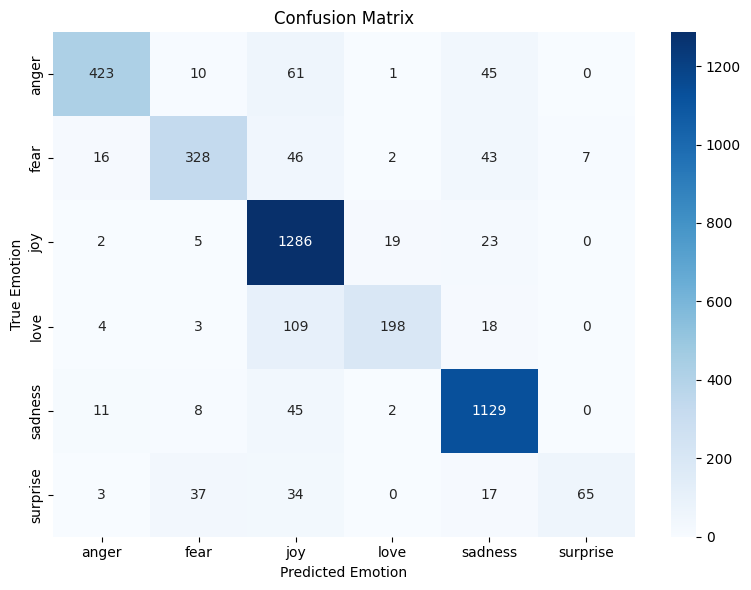

<Figure size 1000x600 with 0 Axes>

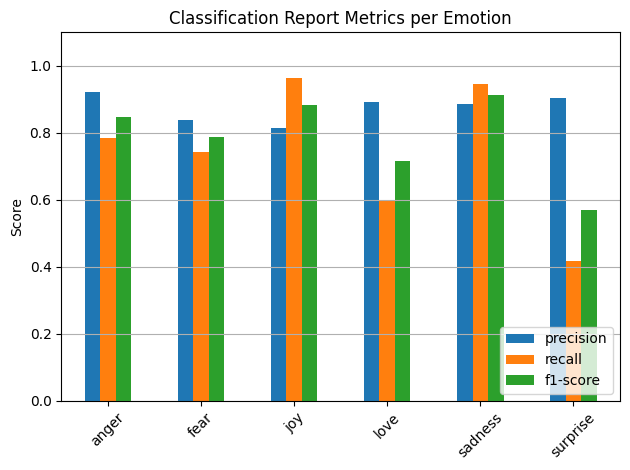

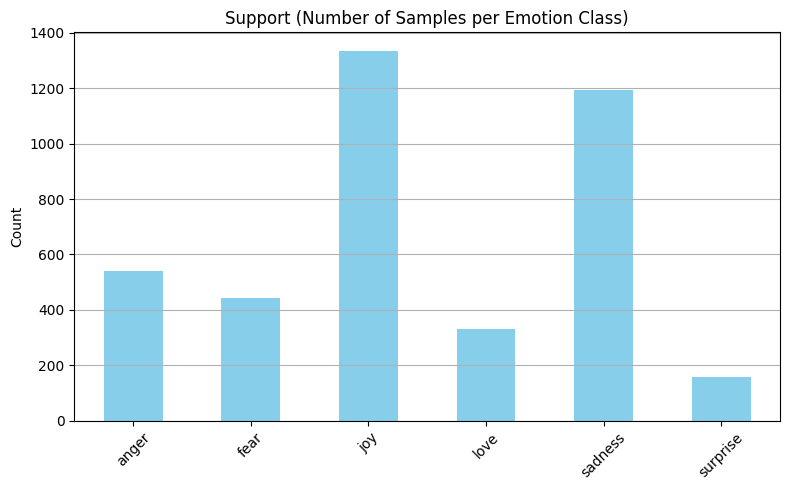

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
import re

nltk.download('punkt')

# ---------------------- Load Dataset ----------------------

def load_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    data = [line.strip().split(';') for line in lines if ';' in line]
    return pd.DataFrame(data, columns=['text', 'emotion'])

# Load train, val, and test files
train_df = load_file("train.csv")
val_df = load_file("val.csv")
test_df = load_file("test.csv")

# Combine all data for training and evaluation
df = pd.concat([train_df, val_df, test_df]).reset_index(drop=True)

# ---------------------- Preprocessing ----------------------

def preprocess(text):
    # Remove special characters and tokenize with regex
    tokens = re.findall(r'\b\w+\b', text.lower())
    return " ".join(tokens)
df['text'] = df['text'].astype(str).apply(preprocess)

# ---------------------- Vectorization ----------------------

X = df['text']
y = df['emotion']

vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# ---------------------- Train-Test Split ----------------------

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# ---------------------- Model Training ----------------------

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ---------------------- Evaluation ----------------------

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------- Prediction Function ----------------------

def predict_emotion(text):
    text = preprocess(text)
    vect = vectorizer.transform([text])
    return model.predict(vect)[0]

# Example
print("\nPredicted emotion:", predict_emotion("I'm so excited to start my new job!"))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# -------------------------------------
# 1. Confusion Matrix
# -------------------------------------
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.tight_layout()
plt.show()

# -------------------------------------
# 2. Classification Report Bar Chart
# -------------------------------------
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

plt.figure(figsize=(10,6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("Classification Report Metrics per Emotion")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------
# 3. Support Count per Class
# -------------------------------------
support = report_df['support']
plt.figure(figsize=(8,5))
support.plot(kind='bar', color='skyblue')
plt.title("Support (Number of Samples per Emotion Class)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

